In [26]:
from evaluate import load_runs_metadata_table, evaluate_arp, evaluate_replicability, evaluate_result_delta, long_table, table_ARP_statsig
from plot import result_table, table_ARP_full, table_RD_DRI, plot_DRI_ER, plot_arp, plot_per_topic_dif, plot_per_topic, plot_per_topic_delta

import matplotlib.pyplot as plt

In [2]:
df = load_runs_metadata_table()
df = evaluate_arp(df)
df = evaluate_result_delta(df)
df = evaluate_replicability(df)

long = long_table(df)

/home/jueri/dev/DCIR/evaluation/evaluate.py:105: RuntimeWarning: invalid value encountered in double_scalars
  return (base - advanced) / base
/home/jueri/dev/DCIR/evaluation/evaluate.py:105: RuntimeWarning: divide by zero encountered in double_scalars
  return (base - advanced) / base
/home/jueri/dev/DCIR/evaluation/evaluate.py:142: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table["result_delta"].apply(pd.Series),
/home/jueri/dev/DCIR/evaluation/evaluate.py:142: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  table["result_delta"].apply(pd.Series),
/home/jueri/dev/DCIR/evaluation/evaluate.py:142: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

Error in run-longeval-LT-test-bm25_d2q10-pyterrier not all topics match with BM25 baseline


# Table

In [3]:
table_ARP_statsig(df, dataset="longeval", subcollections=["WT", "ST", "LT"], highlight=True)

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/hom

In [4]:
table_ARP_statsig(df, dataset="tripclick-test-head", subcollections=["t1", "t2", "t3"], highlight=True)

/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [5]:
table_ARP_statsig(df, dataset="trec-covid", subcollections=["round1", "round2", "round3", "round4", "round5"], highlight=True)

/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runs_table["sorter"] = runs_table["method"].replace(sort_dict)
/home/jueri/dev/DCIR/evaluation/evaluate.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# Long

In [6]:
table_ARP_full(long, highlight=True, save=False)

In [7]:
table_ARP_full(long, highlight=True, save=False)

In [8]:
table_RD_DRI(long, highlight=True, save=False)

In [9]:
MEASURES = ["ndcg", "bpref", "P_10"]

In [14]:
from matplotlib import colors
import seaborn as sns


def table_RD_DRI(long, dataset, highlight=True, save=False):

    def b_abs(s):
        max_val = max(s.max(), abs(s.min()))
        norm = colors.Normalize(0, max_val)
        normed = norm(abs(s.values))

        style = []
        for val in abs(normed):
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val < max(normed)*0.4:
                text = "white"
            else:
                text = "black"
            style.append(f"background-color: {c}; color: {text}")
        return style

    def b_pos(s):
        max_val = max(s.max(), abs(s.min()))
        norm = colors.Normalize()
        normed = norm(abs(s.values))
        
        style = []
        for val in normed:
            c = colors.rgb2hex(plt.colormaps["Greens"](val))
            if val < max(normed)*0.4:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")

        return style

    def b_one(s):
        dist = abs(abs(s.values) -1)
        max_val = max(max(dist), min(dist))
        norm = colors.Normalize(min(dist), max_val)
        normed = norm(dist)
        
        style = []
        for val in normed:
            c = colors.rgb2hex(plt.colormaps["Greens"].reversed()(val))
            if val > max(normed)*0.5:
                text = "black"
            else:
                text = "white"
            style.append(f"background-color: {c}; color: {text}")

        return style

    # data
    long = long[long["dataset"]==dataset]

    df = long[(long["group"].isin(["ARP", "RD", "DRI", "ER"])) & (long["measure"].isin(MEASURES)) & (long["method"]!= "BM25")]
    df = df.pivot(index=["measure", "method"], columns=["dataset", "subcollection", "group"], values="value").sort_index(axis=1)

    # style
    if highlight:
        df_styled = df.style.format(precision=3).format_index(escape="latex")
        for index in df.index.levels[0]:
            for col in df.columns:
                if col[2] in ["ER", "DRI"]:
                    df_styled = df_styled.apply(b_abs, subset=(index, col))
                if col[2] in ["RD", "ARP"]:
                    df_styled = df_styled.apply(b_pos, subset=(index, col))
                if col[2] in ["ER"]:
                    df_styled = df_styled.apply(b_one, subset=(index, col))
        df = df_styled
    if save:
        df.to_latex(f"../../../paper/ECIR23/tables/t-{dataset}.tex", convert_css=True)
    return df

In [15]:
table_RD_DRI(long, dataset="longeval", highlight=True, save=False)

In [16]:
table_RD_DRI(long, dataset="tripclick-test-head", highlight=True, save=False)

In [17]:
table_RD_DRI(long, dataset="trec-covid", highlight=True, save=False)

# ARP

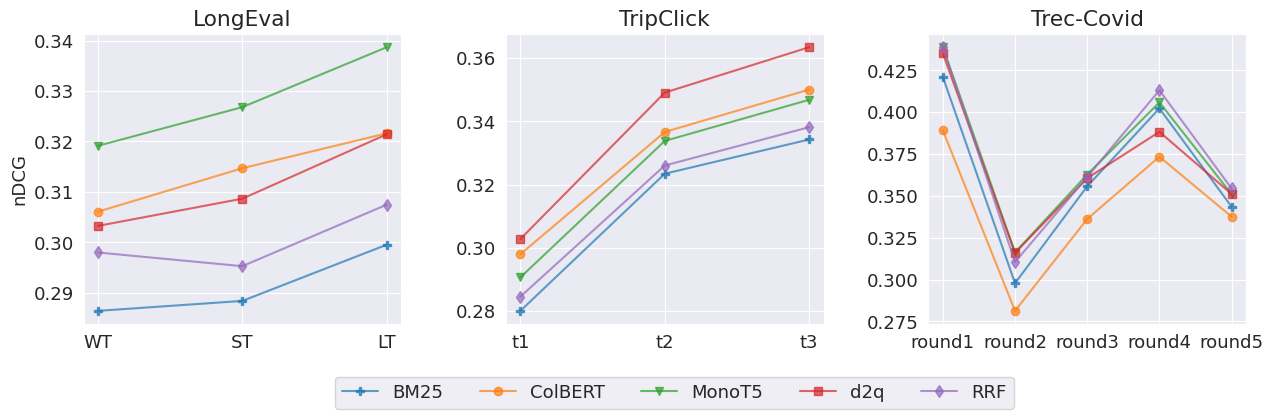

In [19]:
# Plot
plt.rcParams.update({'font.size': 13})
figure, axis = plt.subplots(1, 3, figsize=(15,5))

measure = "ndcg"
symbols=["-P","-o","-v","-s", "-d"]
DISPLAY_NAMES = {
    'bm25': "BM25",
    "E5": "E5",
    'bm25+colbert': "ColBERT", 
    'rrf(xsqram__bm25_bo1__pl2)': "RRF", 
    'bm25+monot5': "MonoT5",
    'bm25_d2q10': "d2q",
}

# Data
dataset = "longeval"
title = "LongEval"

res = df[df["dataset"]==dataset]
sorted_columns = ["WT", "ST", "LT"]

res = res.pivot_table(index='method', columns='subcollection', values=f"ARP_{measure}")[sorted_columns].T

for i, sym in enumerate(symbols):
    axis[0].plot(res.index, res[res.columns[i]], sym, alpha=0.7)
axis[0].set_ylabel("nDCG")
axis[0].set_title(title)




dataset = "tripclick-test-head"
title = "TripClick"

res = df[df["dataset"]==dataset]

res = res.pivot_table(index='method', columns='subcollection', values=f"ARP_{measure}").T

for i, sym in enumerate(symbols):
    axis[1].plot(res.index, res[res.columns[i]], sym, alpha=0.7)
axis[1].set_title(title)



dataset = "trec-covid"
title = "Trec-Covid"

res = df[df["dataset"]==dataset]

res = res.pivot_table(index='method', columns='subcollection', values=f"ARP_{measure}").T

for i, sym in enumerate(symbols):
    axis[2].plot(res.index, res[res.columns[i]], sym, alpha=0.7)
axis[2].set_title(title)


figure.subplots_adjust(bottom=0.3, wspace=0.33)

display_name = [DISPLAY_NAMES[m] for m in res.columns]
axis[2].legend(display_name, loc='upper center', bbox_to_anchor=(0.-0.8, -0.15), ncol=6)
# figure.suptitle(title)

plt.savefig(f"../../../paper/ECIR23/figures/ARP_all.png", bbox_inches='tight', dpi=700)


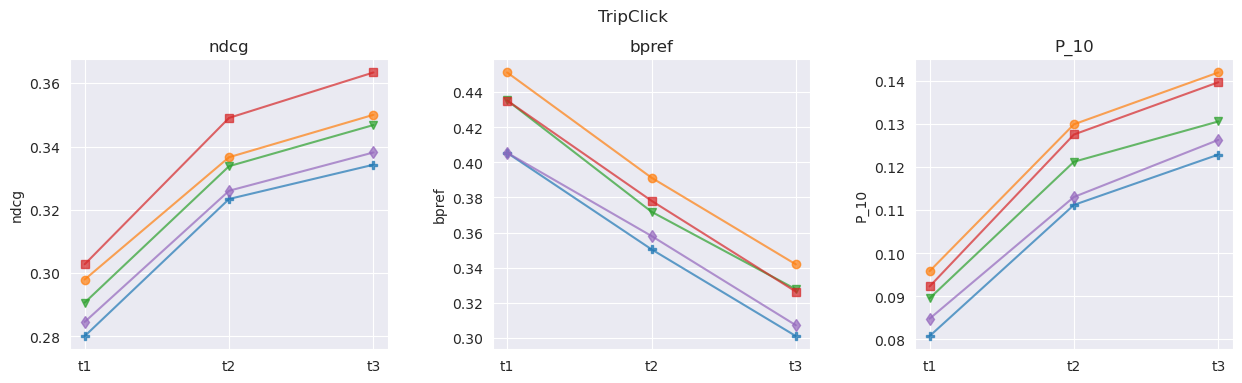

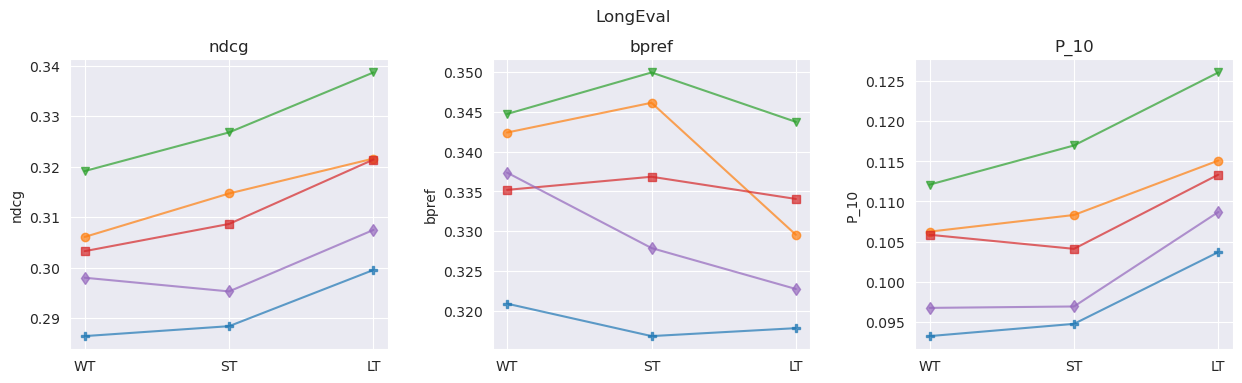

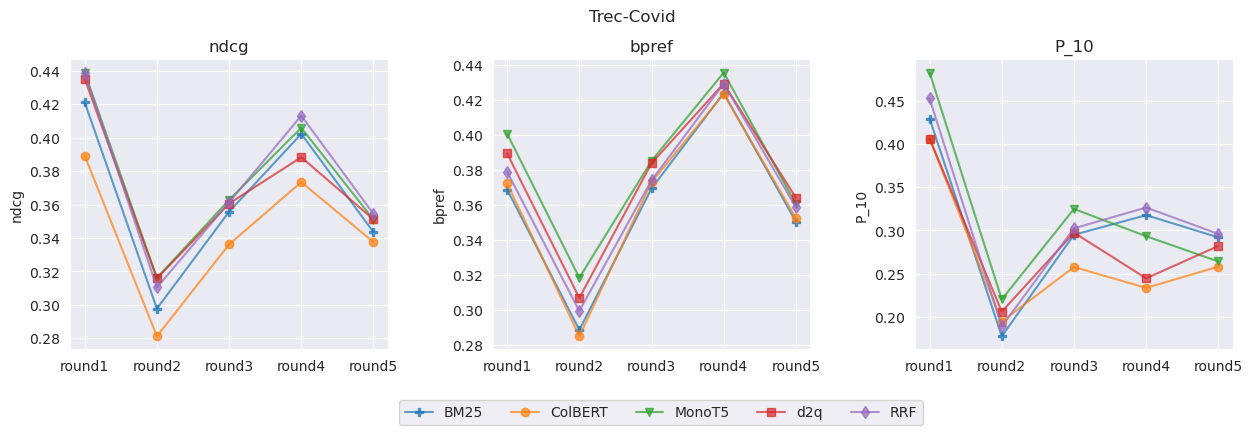

In [20]:
plot_arp(df, "tripclick-test-head", title="TripClick")
plot_arp(df, "longeval", title="LongEval", sorted_columns=["WT", "ST", "LT"])
plot_arp(df, "trec-covid", title="Trec-Covid", legend=True)

# Diff

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


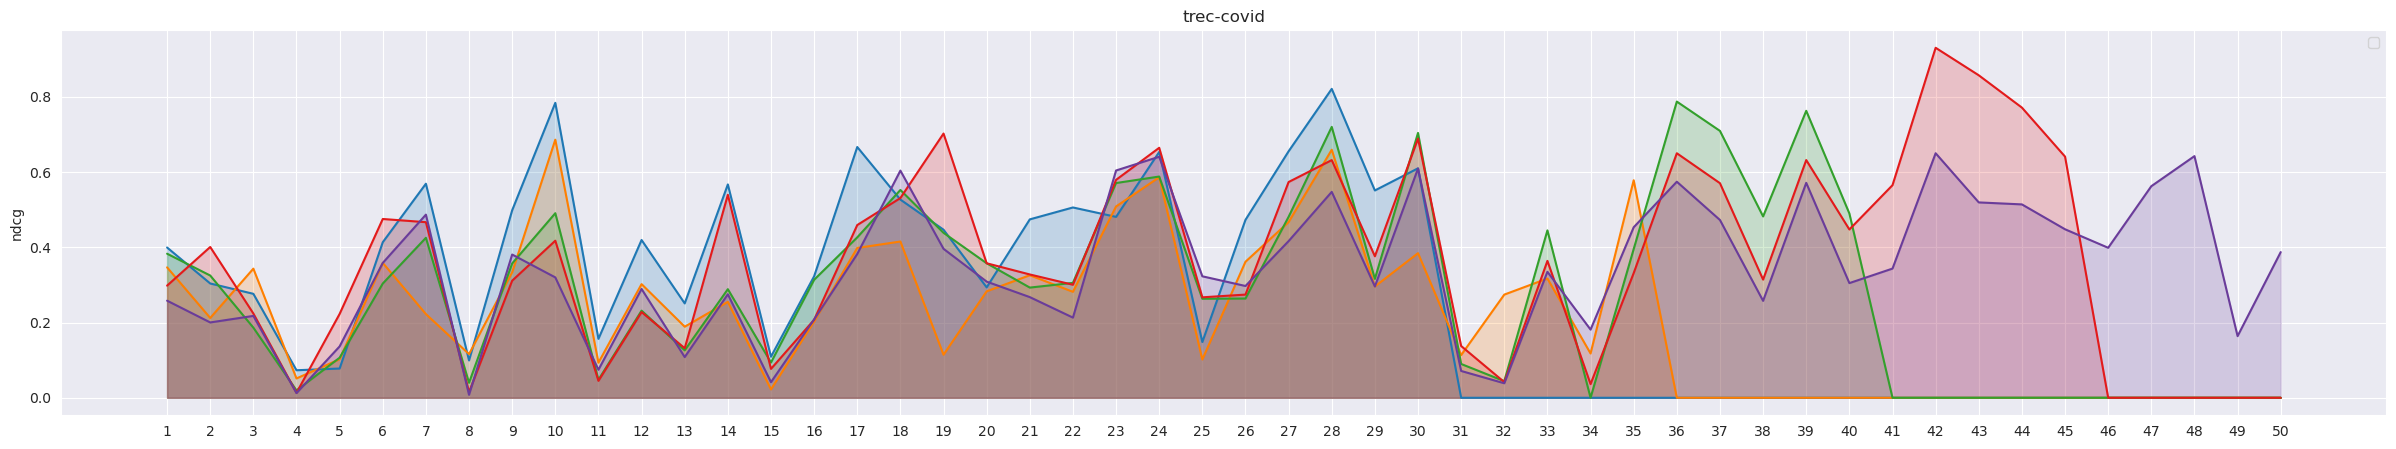

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


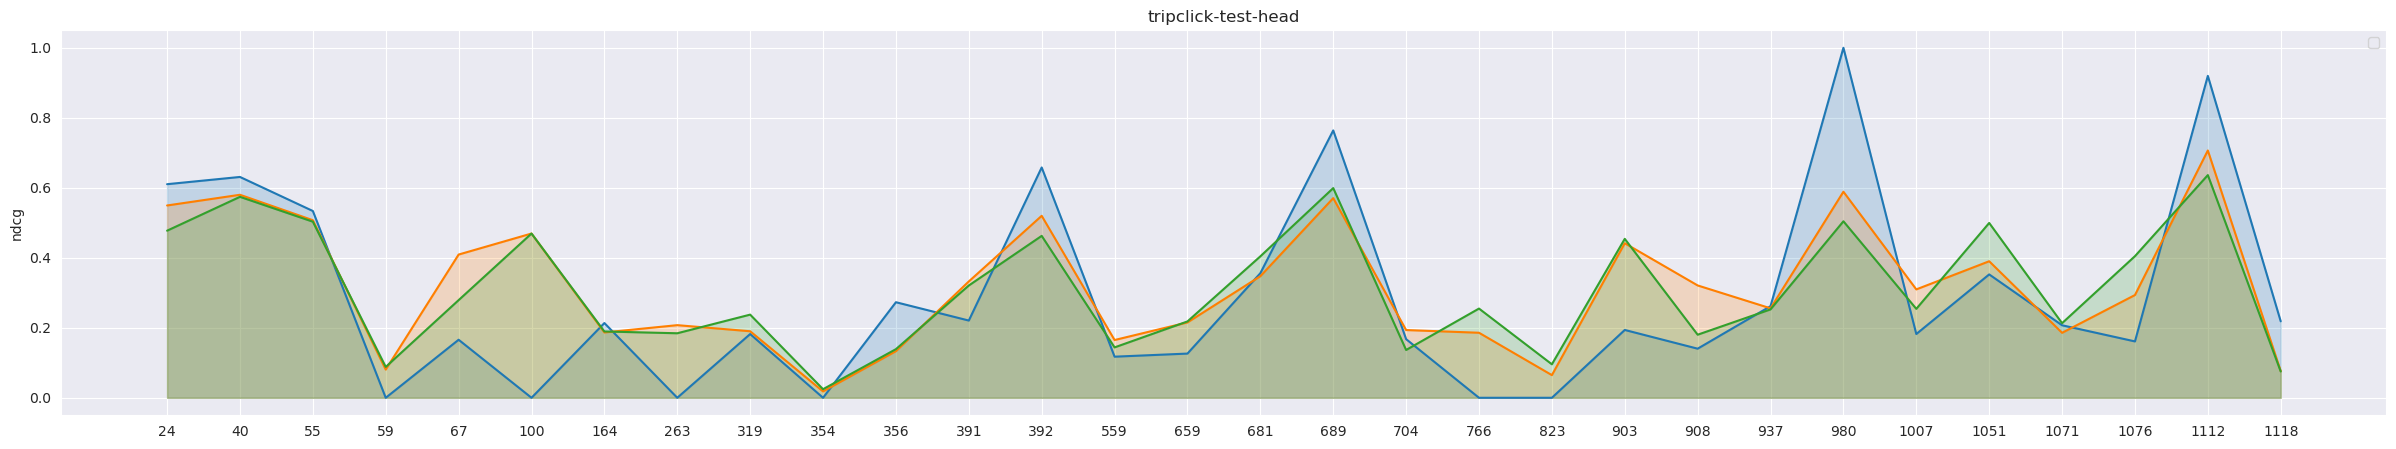

In [21]:
plot_per_topic_dif(df, "trec-covid", "bm25", "ndcg", subcollections = ["round1", "round2", "round3", "round4", "round5"])
plot_per_topic_dif(df, "tripclick-test-head", "bm25", "ndcg", subcollections=["t1", "t2", "t3"], cut_off=30)

# Per topic

In [27]:
plot_per_topic(df, "trec-covid", "bm25", "ndcg", subcollections=["round1", "round2", "round3", "round4", "round5"], cut_off=30)
plot_per_topic(df, "tripclick-test-head", "bm25", "ndcg", subcollections=["t1", "t2", "t3"], cut_off=30)

KeyError: 'ARP_ndcg'

# Delta

In [28]:
plot_per_topic_delta(df, "trec-covid", "bm25", "ndcg", subcollections = ["round1", "round2"], cut_off=30)
plot_per_topic_delta(df, "tripclick-test-head", "bm25", "ndcg", subcollections=["t1", "t2"], cut_off=200)

KeyError: 'ARP_ndcg'

# DRI

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


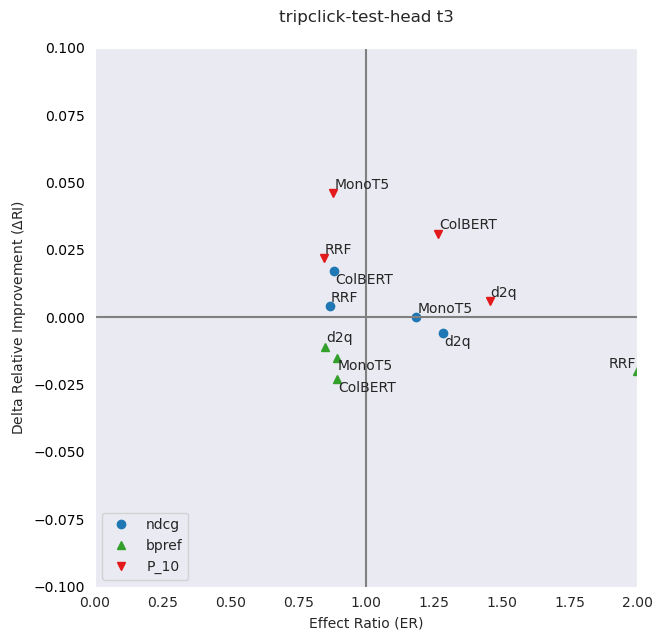

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


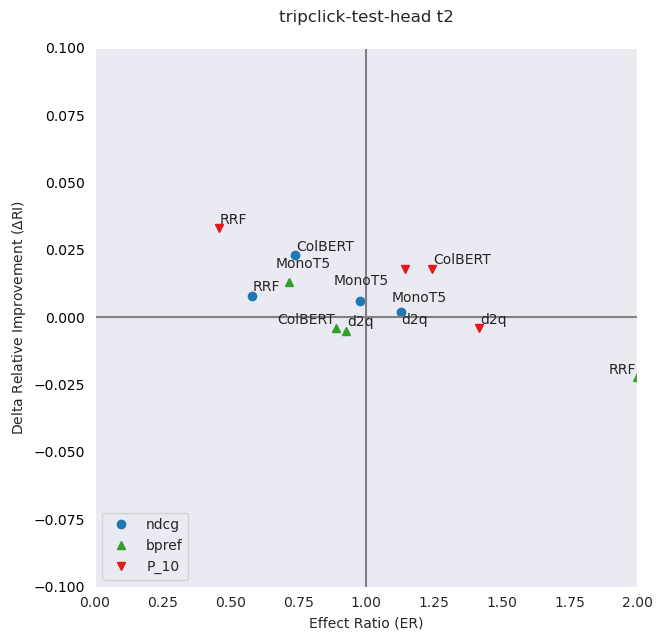

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


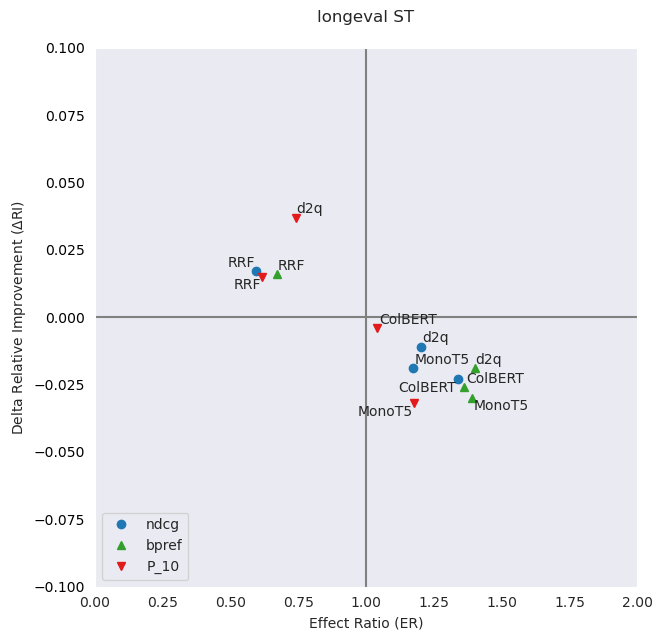

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


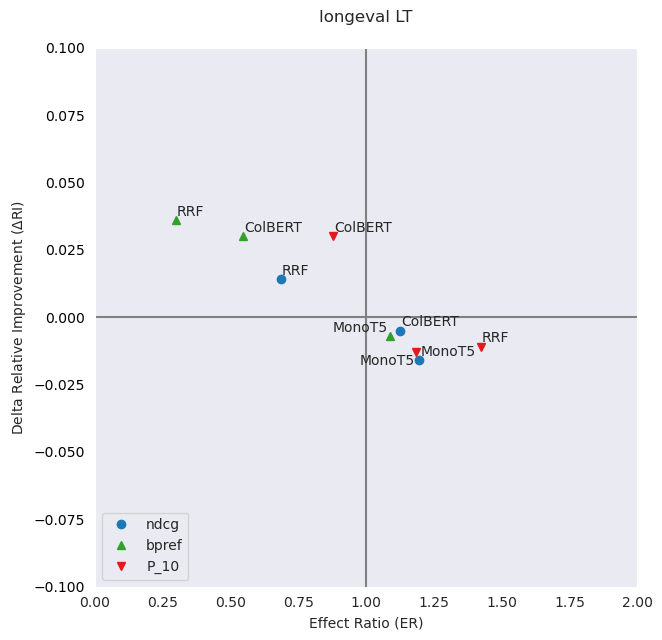

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


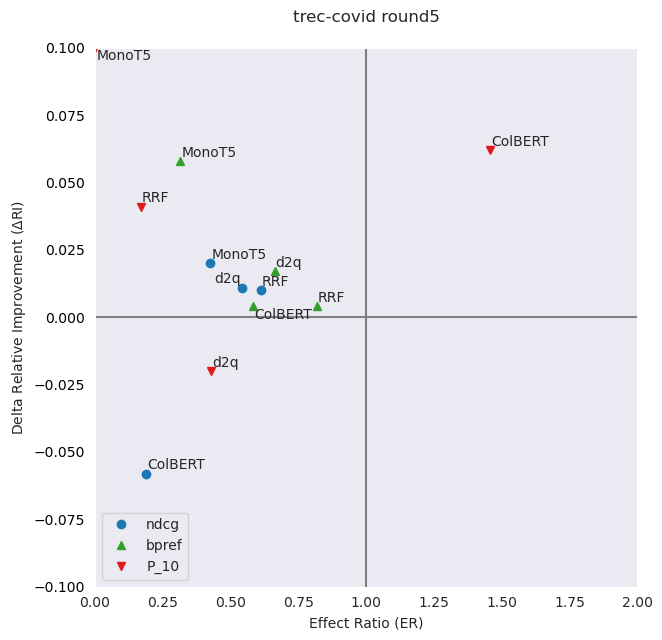

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


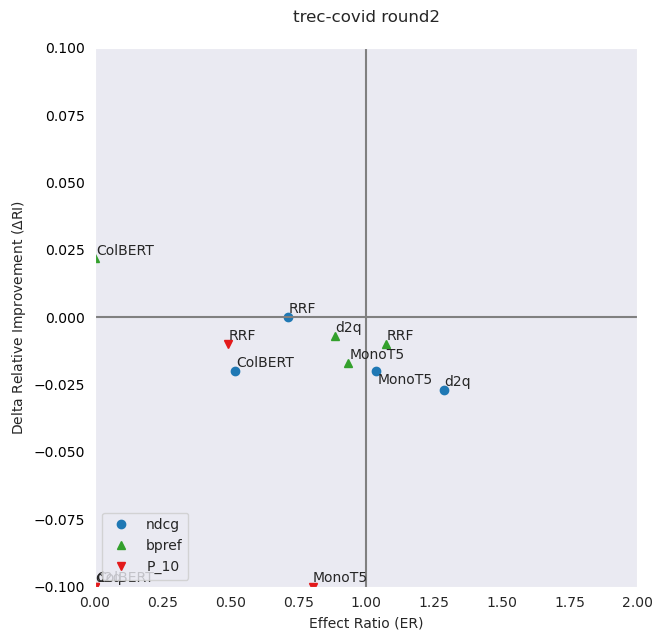

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


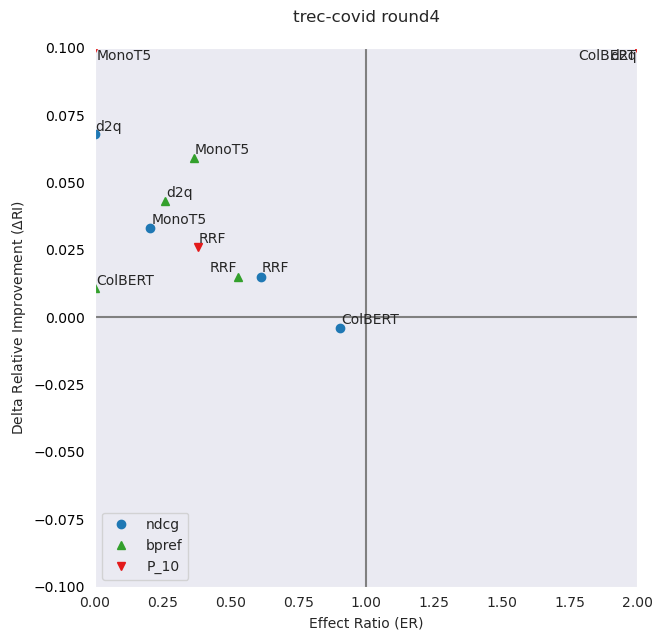

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


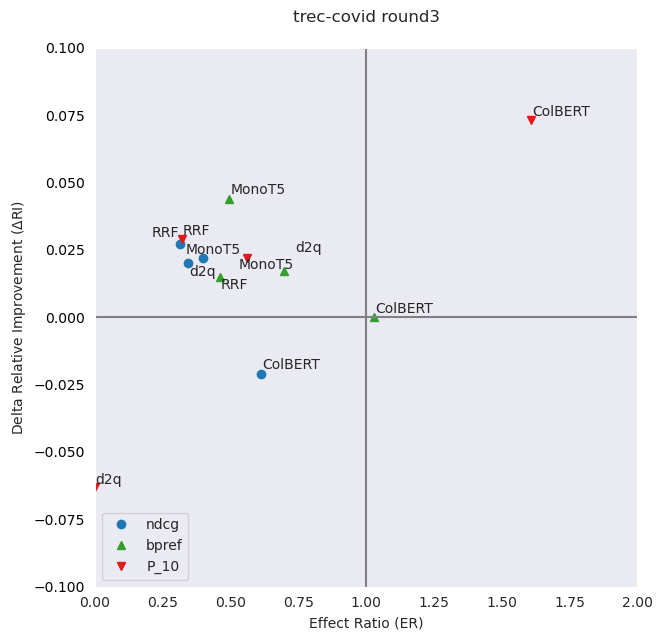

In [29]:
plot_DRI_ER(long)